# Data:
1. Quantitative:
   - discreete
   - continuous
2. Qualitative:
   - bla

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = np.random.randint(1,100,500000)

In [3]:
data_reshaped = data.reshape(100000, 5)

In [4]:
df = pd.DataFrame(data_reshaped)

In [5]:
df

,0,1,2,3,4
0,55,49,91,30,10
1,26,57,41,62,54
2,24,52,58,86,29
3,82,58,38,47,67
4,86,43,4,22,63
...,...,...,...,...,...
99995,92,56,3,34,48
99996,47,78,1,8,58
99997,14,29,86,78,2
99998,41,71,62,94,23


In [6]:
# rename columns
df.columns = ['Col'+str(col) if isinstance(col, int) else col for col in df.columns]

In [7]:
df

,Col0,Col1,Col2,Col3,Col4
0,55,49,91,30,10
1,26,57,41,62,54
2,24,52,58,86,29
3,82,58,38,47,67
4,86,43,4,22,63
...,...,...,...,...,...
99995,92,56,3,34,48
99996,47,78,1,8,58
99997,14,29,86,78,2
99998,41,71,62,94,23


In [8]:
for var in df.columns:
    #var = 'Col1'
    conditions = [(df[var] >= 0) & (df[var] < 10),
                  (df[var] >= 10) & (df[var] < 20),
                  (df[var] >= 20) & (df[var] < 30),
                  (df[var] >= 30) & (df[var] < 40),
                  (df[var] >= 40) & (df[var] < 50),
                  (df[var] >= 50) & (df[var] < 60),
                  (df[var] >= 60) & (df[var] < 70),
                  (df[var] >= 70) & (df[var] < 80),
                  (df[var] >= 80) & (df[var] < 90),
                  (df[var] >= 90) & (df[var] < 100)]
    results = ['0-9 let','10-19 let','20-29 let','30-39 let','40-49 let',
               '50-59 let','60-69 let','70-79 let','80-89 let','90-99 let']
    df[var+'_bin'] = np.select(condlist=conditions, choicelist=results, default='ERROR')

In [9]:
df

,Col0,Col1,Col2,Col3,Col4,Col0_bin,Col1_bin,Col2_bin,Col3_bin,Col4_bin
0,55,49,91,30,10,50-59 let,40-49 let,90-99 let,30-39 let,10-19 let
1,26,57,41,62,54,20-29 let,50-59 let,40-49 let,60-69 let,50-59 let
2,24,52,58,86,29,20-29 let,50-59 let,50-59 let,80-89 let,20-29 let
3,82,58,38,47,67,80-89 let,50-59 let,30-39 let,40-49 let,60-69 let
4,86,43,4,22,63,80-89 let,40-49 let,0-9 let,20-29 let,60-69 let
...,...,...,...,...,...,...,...,...,...,...
99995,92,56,3,34,48,90-99 let,50-59 let,0-9 let,30-39 let,40-49 let
99996,47,78,1,8,58,40-49 let,70-79 let,0-9 let,0-9 let,50-59 let
99997,14,29,86,78,2,10-19 let,20-29 let,80-89 let,70-79 let,0-9 let
99998,41,71,62,94,23,40-49 let,70-79 let,60-69 let,90-99 let,20-29 let


In [10]:
assert len(df[df.eq('ERROR').any(axis = 1)]) == 0

In [11]:
df['Count'] = 1

In [12]:
df1 = df[['Col0_bin', 'Count']].groupby(by = 'Col0_bin').count()

In [13]:
df1

,Count
Col0_bin,
0-9 let,9237
10-19 let,10100
20-29 let,10178
30-39 let,10091
40-49 let,10151
50-59 let,10224
60-69 let,10010
70-79 let,10035
80-89 let,10099


In [14]:
df2 = df1.cumsum(axis = 0)

In [15]:
df2

,Count
Col0_bin,
0-9 let,9237
10-19 let,19337
20-29 let,29515
30-39 let,39606
40-49 let,49757
50-59 let,59981
60-69 let,69991
70-79 let,80026
80-89 let,90125


<Axes: title={'center': 'Cumulative counts'}, xlabel='Col0_bin'>

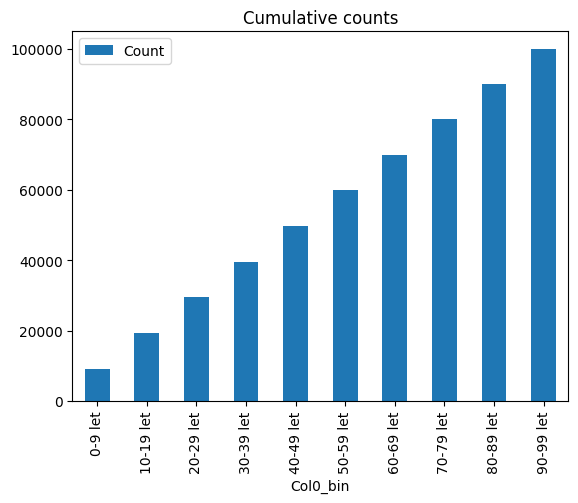

In [16]:
df2.plot.bar(title = 'Cumulative counts')

In [77]:
labels = df2.index.to_numpy()
labels

array(['0-9 let', '10-19 let', '20-29 let', '30-39 let', '40-49 let',
       '50-59 let', '60-69 let', '70-79 let', '80-89 let', '90-99 let'],
      dtype=object)

In [78]:
values = df2['Count'].to_numpy()
values

array([  9237,  19337,  29515,  39606,  49757,  59981,  69991,  80026,
        90125, 100000], dtype=int64)

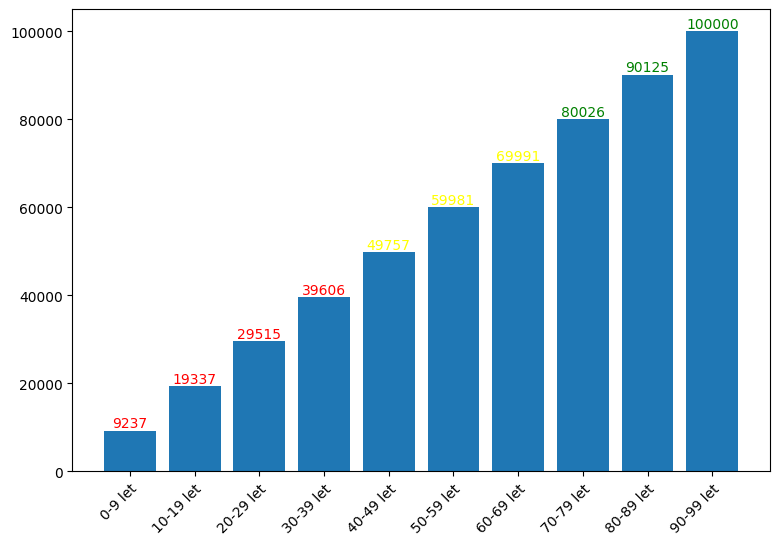

In [82]:
fig, ax = plt.subplots(figsize = (9, 6))
rects = ax.bar(range(len(labels)), values)
[ax.annotate(xy = (r.get_x() + r.get_width()/2, r.get_height()), text = r.get_height(), ha = 'center', va = 'bottom', color = 'red' if r.get_height() < 40000 else 'yellow' if r.get_height() < 70000 else 'green') for r in rects]
plt.xticks(range(len(labels)), labels, ha = 'right', rotation = 45, rotation_mode = 'anchor')
plt.show()

In [57]:
[(r.get_height(), r.get_x(), r.get_width()) for r in rects]

[(9237, -0.4, 0.8),
 (19337, 0.6, 0.8),
 (29515, 1.6, 0.8),
 (39606, 2.6, 0.8),
 (49757, 3.6, 0.8),
 (59981, 4.6, 0.8),
 (69991, 5.6, 0.8),
 (80026, 6.6, 0.8),
 (90125, 7.6, 0.8),
 (100000, 8.6, 0.8)]

In [58]:
[dir(r) for r in rects]

[['_PROPERTIES_EXCLUDED_FROM_SET',
  '__class__',
  '__delattr__',
  '__dict__',
  '__dir__',
  '__doc__',
  '__eq__',
  '__format__',
  '__ge__',
  '__getattribute__',
  '__getstate__',
  '__gt__',
  '__hash__',
  '__init__',
  '__init_subclass__',
  '__le__',
  '__lt__',
  '__module__',
  '__ne__',
  '__new__',
  '__reduce__',
  '__reduce_ex__',
  '__repr__',
  '__setattr__',
  '__sizeof__',
  '__str__',
  '__subclasshook__',
  '__weakref__',
  '_agg_filter',
  '_alias_map',
  '_alpha',
  '_animated',
  '_antialiased',
  '_aspect_ratio_correction',
  '_axes',
  '_callbacks',
  '_capstyle',
  '_clipon',
  '_clippath',
  '_cm_set',
  '_convert_units',
  '_convert_xy_units',
  '_dash_pattern',
  '_different_canvas',
  '_draw_paths_with_artist_properties',
  '_edge_default',
  '_edgecolor',
  '_facecolor',
  '_fill',
  '_fully_clipped_to_axes',
  '_gid',
  '_hatch',
  '_hatch_color',
  '_height',
  '_in_layout',
  '_internal_update',
  '_joinstyle',
  '_label',
  '_linestyle',
  '_linewi

In [72]:
def getPieChart(values, labels):
    fig, ax = plt.subplots(figsize = (6,6))
    plt.pie(x = values, labels = labels, autopct = "%1.2f%%", counterclock = False, startangle = -270)
    plt.show()

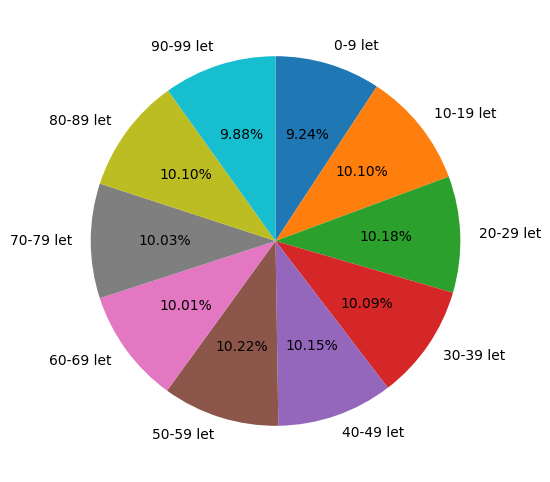

In [75]:
labels = df1.index.to_numpy()
values = df1['Count'].to_numpy()
getPieChart(values, labels)

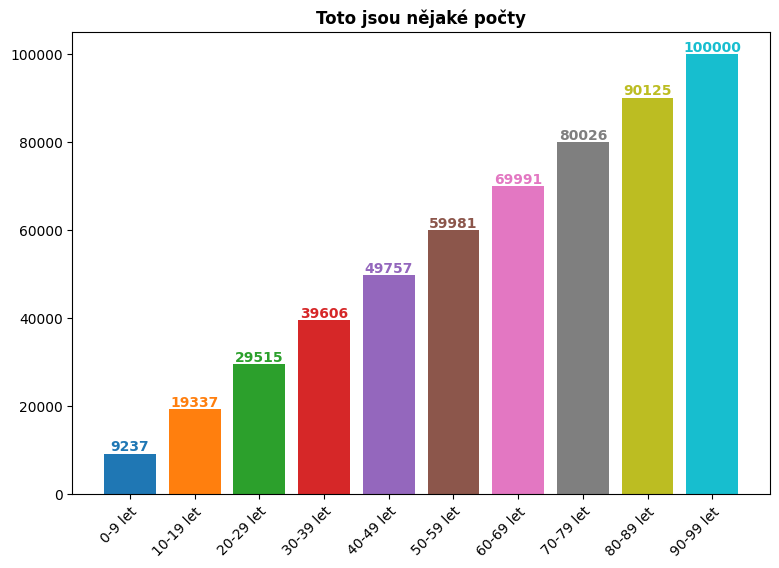

In [105]:
import matplotlib as mpl
cmap = mpl.colormaps['tab10']
colors = cmap(np.linspace(0, 1, len(labels)))

fig, ax = plt.subplots(figsize = (9, 6))
rects = ax.bar(range(len(labels)), values)
[ax.annotate(xy = (r.get_x() + r.get_width()/2, r.get_height()), text = r.get_height(), ha = 'center', va = 'bottom', color = colors[i], weight = 'bold') for i, r in enumerate(rects)]
[ax.bar(x = r.get_x() + r.get_width()/2, height = r.get_height(), color = colors[i], width = r.get_width()) for i, r in enumerate(rects)]
plt.xticks(range(len(labels)), labels, ha = 'right', rotation = 45, rotation_mode = 'anchor')
plt.title(label = 'Toto jsou nějaké počty', weight = 'bold')
plt.show()

In [94]:
colors

array([[0.12156863, 0.46666667, 0.70588235, 1.        ],
       [1.        , 0.49803922, 0.05490196, 1.        ],
       [0.17254902, 0.62745098, 0.17254902, 1.        ],
       [0.83921569, 0.15294118, 0.15686275, 1.        ],
       [0.58039216, 0.40392157, 0.74117647, 1.        ],
       [0.76862745, 0.61176471, 0.58039216, 1.        ],
       [0.96862745, 0.71372549, 0.82352941, 1.        ],
       [0.78039216, 0.78039216, 0.78039216, 1.        ],
       [0.85882353, 0.85882353, 0.55294118, 1.        ],
       [0.61960784, 0.85490196, 0.89803922, 1.        ]])